In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# Cargar los datos (reemplaza esto con la ruta a tus datos)
datos = pd.read_csv('datos_exportados_clean.csv')

In [59]:
# Preprocesamiento básico
datos.dropna(subset=['SST'], inplace=True)

In [60]:
datos

,Fecha,Latitud,Longitud,SST
486,01-Sep-1981,31.125,-114.875,30.57000
487,01-Sep-1981,31.375,-114.875,30.68500
531,01-Sep-1981,30.125,-114.625,29.62067
532,01-Sep-1981,30.375,-114.625,29.74567
533,01-Sep-1981,30.625,-114.625,29.92100
...,...,...,...,...
1318940,01-Dec-2023,21.625,-105.625,27.27581
1318941,01-Dec-2023,21.875,-105.625,27.01290
1318985,01-Dec-2023,20.625,-105.375,27.19710
1318987,01-Dec-2023,21.125,-105.375,27.37774


In [61]:
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
datos['Año'] = datos['Fecha'].dt.year
datos['Mes'] = datos['Fecha'].dt.month
X = datos[['Latitud', 'Longitud', 'Año', 'Mes']]
y = datos['SST']

In [62]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
X

,Latitud,Longitud,Año,Mes
486,31.125,-114.875,1981,9
487,31.375,-114.875,1981,9
531,30.125,-114.625,1981,9
532,30.375,-114.625,1981,9
533,30.625,-114.625,1981,9
...,...,...,...,...
1318940,21.625,-105.625,2023,12
1318941,21.875,-105.625,2023,12
1318985,20.625,-105.375,2023,12
1318987,21.125,-105.375,2023,12


In [64]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Entrenar el modelo de Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [66]:
# Función para preparar nuevas características para predicción
def preparar_caracteristicas(fechas, latitudes, longitudes):
    # Convertir a DataFrame
    df_nuevo = pd.DataFrame({'Fecha': pd.to_datetime(fechas), 'Latitud': latitudes, 'Longitud': longitudes})
    df_nuevo['Año'] = df_nuevo['Fecha'].dt.year
    df_nuevo['Mes'] = df_nuevo['Fecha'].dt.month
    return df_nuevo[['Latitud', 'Longitud', 'Año', 'Mes']]

In [131]:
# Generar nuevas fechas para predicción
fechas_futuras = pd.date_range('2020-01-01', periods=36, freq='M') # 3 años de predicciones mensuales
latitudes_ejemplo = [21.125] * len(fechas_futuras)  # Ejemplo de latitud fija
longitudes_ejemplo = [-106.625] * len(fechas_futuras)  # Ejemplo de longitud fija
#21.125,-106.625



In [132]:
# Preparar características para las nuevas predicciones
X_nuevo = preparar_caracteristicas(fechas_futuras, latitudes_ejemplo, longitudes_ejemplo)

In [133]:
# Escalar las nuevas características
X_nuevo_scaled = scaler.transform(X_nuevo)

In [134]:
# Hacer las predicciones
predicciones_sst = random_forest_regressor.predict(X_nuevo_scaled)


In [135]:
# Resultados
resultados = pd.DataFrame({
    'Fecha': fechas_futuras,
    'Prediccion_SST': predicciones_sst
})

resultados.to_csv("resultados2.csv", index=False)
print(resultados)


        Fecha  Prediccion_SST
0  2020-01-31       26.352631
1  2020-02-29       24.522648
2  2020-03-31       24.602211
3  2020-04-30       25.139078
4  2020-05-31       25.895255
5  2020-06-30       27.328676
6  2020-07-31       28.863648
7  2020-08-31       29.606893
8  2020-09-30       29.440374
9  2020-10-31       29.875484
10 2020-11-30       28.801076
11 2020-12-31       25.572162
12 2021-01-31       22.673191
13 2021-02-28       22.757138
14 2021-03-31       23.428549
15 2021-04-30       24.817179
16 2021-05-31       26.998744
17 2021-06-30       28.229369
18 2021-07-31       29.144830
19 2021-08-31       29.971042
20 2021-09-30       29.233350
21 2021-10-31       29.476490
22 2021-11-30       28.698594
23 2021-12-31       27.089305
24 2022-01-31       25.277580
25 2022-02-28       24.104055
26 2022-03-31       24.234016
27 2022-04-30       24.378389
28 2022-05-31       25.929438
29 2022-06-30       27.099510
30 2022-07-31       29.328962
31 2022-08-31       30.194438
32 2022-09

In [103]:
res1= pd.read_csv("resultados2.csv")

In [104]:
res2 = pd.read_csv("resultados1.csv")

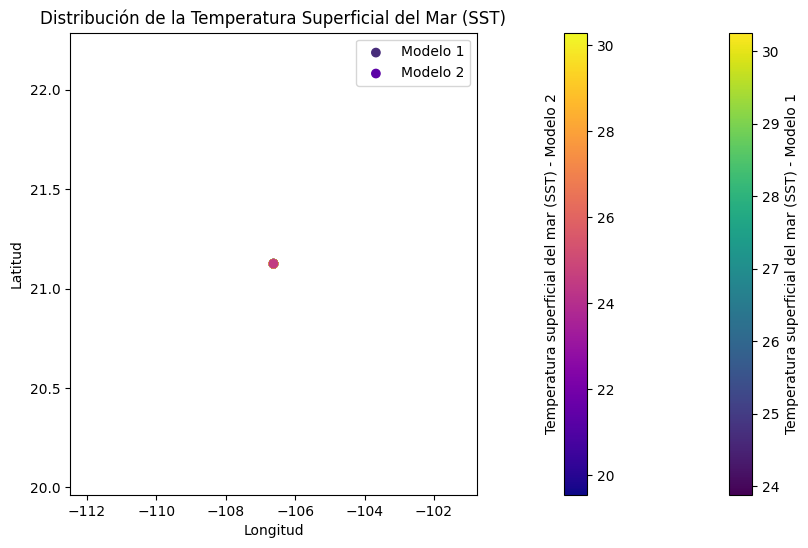

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Gráfico para el primer modelo
sc = plt.scatter(longitudes_ejemplo, latitudes_ejemplo, c=res1['Prediccion_SST'], cmap='viridis', label='Modelo 1')

# Gráfico para el segundo modelo
sc1 = plt.scatter(longitudes_ejemplo, latitudes_ejemplo, c=res2['Prediccion_SST'], cmap='plasma', label='Modelo 2')

# Crear la barra de colores para el primer modelo
cbar = plt.colorbar(sc, label='Temperatura superficial del mar (SST) - Modelo 1', pad=0.1)

# Crear la barra de colores para el segundo modelo
cbar1 = plt.colorbar(sc1, label='Temperatura superficial del mar (SST) - Modelo 2', pad=0.15)
cbar1.ax.yaxis.set_label_position('left')

# Etiquetas y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de la Temperatura Superficial del Mar (SST)')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
